# Building a mask-face classification model using MobileNet without retrain

This notebook would build, train, and evaluate a model using `transfer learning` with MobileNet for masked faces classification.

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
try:
    %tensorflow_version 2.x
except:
    pass

In [3]:
import matplotlib.pyplot as plt
import os
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
DATASET_DIR = '/content/drive/MyDrive/capstone_machine_learning/capstone_dataset/arranged_dataset' # Change based on dataset dir on your system/device
TRAIN_DIR = os.path.join(DATASET_DIR, 'train')
VAL_DIR = os.path.join(DATASET_DIR, 'validation')
TEST_DIR = os.path.join(DATASET_DIR, 'test')

## Load images using ImageDataGenerator

In [5]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches using train_datagen generator
train_iterator = train_datagen.flow_from_directory(
        TRAIN_DIR,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized
        batch_size=100,
        class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1/255)
val_iterator = val_datagen.flow_from_directory(
        VAL_DIR,
        target_size=(224, 224),
        batch_size=100,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1/255)
test_iterator = test_datagen.flow_from_directory(
        TEST_DIR,
        target_size=(224, 224),
        batch_size=100,
        class_mode='categorical')

Found 10000 images belonging to 5 classes.
Found 2000 images belonging to 5 classes.
Found 2000 images belonging to 5 classes.


## Debug dataset iterators

In [6]:
# dir(train_iterator) # to know what attributes and methods the iterator has

In [7]:
print(train_iterator.classes)
print(train_iterator.class_indices)
print(val_iterator.classes)
print(val_iterator.class_indices)
print(test_iterator.classes)
print(test_iterator.class_indices)

[0 0 0 ... 4 4 4]
{'correctly_masked': 0, 'no_mask': 1, 'uncovered_chin': 2, 'uncovered_nose': 3, 'uncovered_nose_and_mouth': 4}
[0 0 0 ... 4 4 4]
{'correctly_masked': 0, 'no_mask': 1, 'uncovered_chin': 2, 'uncovered_nose': 3, 'uncovered_nose_and_mouth': 4}
[0 0 0 ... 4 4 4]
{'correctly_masked': 0, 'no_mask': 1, 'uncovered_chin': 2, 'uncovered_nose': 3, 'uncovered_nose_and_mouth': 4}


Train samples
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


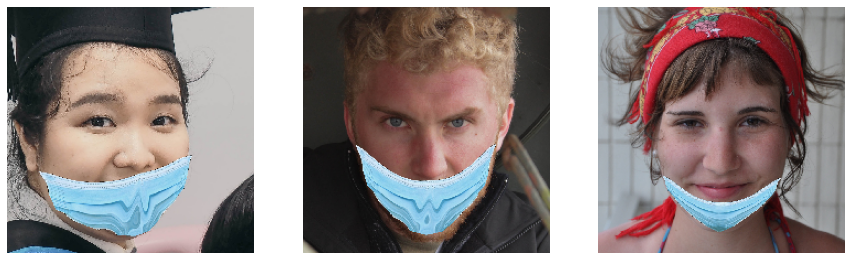

Validation samples
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


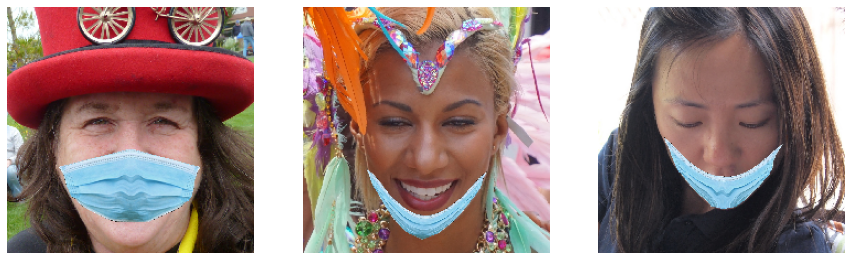

Test samples
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


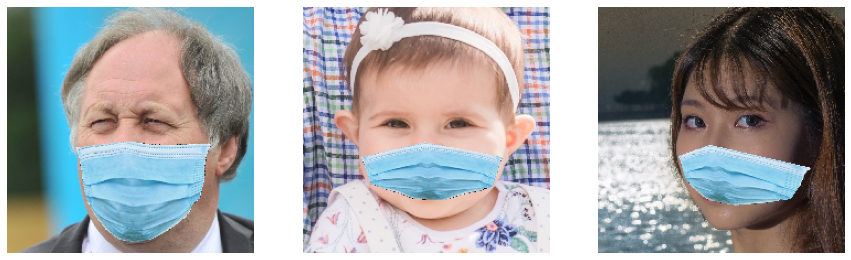

In [8]:
# Sample some images in data iterator to display

def display_samples(iterator):
  '''
  Source: https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/
  '''
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))
  for i in range(3):

    image = next(iterator)[0][0]
    print(image.shape)

    ax[i].imshow(image)
    ax[i].axis('off')
  fig.show()
  plt.show()

print('Train samples')
display_samples(train_iterator)
print('Validation samples')
display_samples(val_iterator)
print('Test samples')
display_samples(test_iterator)